In [24]:
import numpy as np
import os
import random
import sys
from PIL import Image
import time
import torch
from scipy import misc
import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
cd '/home/bony/Deep_Learning_Stanford_CS230/Project/Code'

/home/bony/Deep_Learning_Stanford_CS230/Project/Code


In [25]:
pwd

'/home/bony/Deep_Learning_Stanford_CS230/Project/Code'

In [62]:


class Dataloader():
    
    def __init__(self, params):
        
        # loading dataset_params
        
        train_path = params.train_data_path
        print(train_path)
        #assert os.path.isfile(train_path), "No training file found at {}".format(train_path)
        
        test_path = params.test_data_path
        #assert os.path.isfile(test_path), "No test file found at {}".format(test_path)
        
    
    def load_data(self, data_type, params, ch_filter = "_green"):
        """
        Reads the image file names  
        Creates a dict, key is the image count, value is the image file name without the extension
        Args:
            channel filter: blue, green, red
        """
        image_dict = {}
        image_count = 0
        print(data_type)
        if (data_type == 'train'):
            current_path = params.train_data_path
            print("datatype is train")
        elif data_type == 'test':
            current_path = params.test_data_path
            
        for filename in os.listdir(current_path):
            #split the file name into name and extension
            #filename,f_ext = os.path.splitext(os.path.join(current_path,files))
            
            #work with images of given filter type, green, blue, red
            if ch_filter in filename:
                #image_name = filename.replace(ch_filter, "")
                
                image_count += 1
                image_dict[image_count] = filename
                    
        return image_dict
        
    
    
    def load_labels(self, data_type, params, ch_filter = "_green"):
        
        """
        Loads the labels from their corresponding files. 
        Creates a dict, key is the image name, value is the list of labels
        Args:
            labels_file: each line contains the labels for the corresponding image
        """
        
        #label_file = open("../train.csv", 'r')
        label_dict = {}
        label_file = open(params.train_label_file, 'r')
        
        line = label_file.readline()
        while line:
            line = line.strip()
            line_split = line.split(",") #split each line into image name and labels
            image_name = line_split[0]+ch_filter+".png" # add the filter and .png at the end
            label = line_split[1]
            label_dict[image_name] = label  #create the dict item for the image
            line = label_file.readline()

        label_file.close()
        return label_dict
        
    
    def data_iterator(self, params, image_dict, label_dict, shuffle = False):
        """
        Returns a generator that yields batches data with labels. Batch size is params.batch_size. Expires after one
        pass over the data.
        Args:
            data: (dict) contains data which has keys 'data', 'labels' and 'size'
            params: (Params) hyperparameters of the training process.
            shuffle: (bool) whether the data should be shuffled
        Yields:
            batch_data: (Variable) dimension batch_size x channels X image_size_X X image_size_Y 
            batch_labels: (Variable) dimension batch_size x 4 with the corresponding labels
        """
        
        image_count = len(image_dict)
        channels = params.channels
        size_X = params.im_size_X
        size_Y = params.im_size_Y
        
        order = list(range(image_count))
        if shuffle:
            random.seed(230)
            random.shuffle(order)
            
        # one pass over data
        for i in range((image_count+1)//params.batch_size):
            # "i" denotes batch number
            batch_image_index = order[i*params.batch_size: (i+1)*params.batch_size]
            
            # Create arrays for batch data and labels
            batch_data = np.zeros([params.batch_size, channels, size_X, size_Y])
            batch_labels = np.zeros([params.batch_size, 4])
            
            # one pass over all the images in the batch
            for j in batch_image_index:
                image_name = image_dict[j] # get the image file name
                img1 = misc.imread(image_name) #convert to a numpy array
                
                batch_data[i,1,:,:] = img1
                batch_label[i,:] = label_dict[image_name]
            
            # since all data are indices, we convert them to torch LongTensors
            batch_data, batch_labels = torch.LongTensor(batch_data), torch.LongTensor(batch_labels)
            
            # shift tensors to GPU if available
            if params.cuda:
                batch_data, batch_labels = batch_data.cuda(), batch_labels.cuda()
                

            # convert them to Variables to record operations in the computational graph
            batch_data, batch_labels = Variable(batch_data), Variable(batch_labels)
    
            yield batch_data, batch_labels
        

In [67]:
json_path = os.path.join('/home/bony/Deep_Learning_Stanford_CS230/Project/Code', 'models/params.json')
params = utils.Params(json_path)
data_loader = Dataloader(params)

image_dict = data_loader.load_data("train", params)
labels_dict = data_loader.load_labels("train", params)

/home/bony/Deep_Learning_Stanford_CS230/Project/Data/train
train
datatype is train


In [69]:
'''
    # use GPU if available
    params.cuda = torch.cuda.is_available()
    
    # Set the random seed for reproducible experiments
    torch.manual_seed(230)
    if params.cuda: torch.cuda.manual_seed(230)
        
    # Set the logger
    utils.set_logger(os.path.join(args.model_dir, 'train.log'))

    # Create the input data pipeline
    logging.info("Loading the datasets...")
    '''


'''
    
    # specify the train and val dataset sizes
    params.train_size = train_data['size']
    params.val_size = val_data['size']

    logging.info("- done.")

    # Define the model and optimizer
    model = net.Net(params).cuda() if params.cuda else net.Net(params)
    optimizer = optim.Adam(model.parameters(), lr=params.learning_rate)
    
    # fetch loss function and metrics
    loss_fn = net.loss_fn
    metrics = net.metrics
    
    '''

'\n    \n    # specify the train and val dataset sizes\n    params.train_size = train_data[\'size\']\n    params.val_size = val_data[\'size\']\n\n    logging.info("- done.")\n\n    # Define the model and optimizer\n    model = net.Net(params).cuda() if params.cuda else net.Net(params)\n    optimizer = optim.Adam(model.parameters(), lr=params.learning_rate)\n    \n    # fetch loss function and metrics\n    loss_fn = net.loss_fn\n    metrics = net.metrics\n    \n    '

In [17]:
img1 = misc.imread("../Data/train/004b47de-bbca-11e8-b2bc-ac1f6b6435d0_green.png")
print(img1.shape)
print(type(img1))

(512, 512)
<class 'numpy.ndarray'>


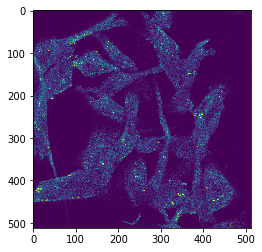

In [23]:
plt.imshow(img1)

In [122]:
from utils import Params

In [137]:
import json
curdir = os.getcwd()

json_path = "Experiments\\base_model\params.json"
json_path = os.path.join(curdir, json_path)

f = open(json_path)
params = json.load(f)

C:\Users\rsbandhu\Documents\MUSTBACKUP\Details\Computers\DeepLearning_Stanford_CS230\Project\all\Experiments\base_model\params.json


In [142]:
params.im_size_X

AttributeError: 'dict' object has no attribute 'im_size_X'

In [ ]:
train_data_iterator = data_loader.data_iterator(train_data, params, shuffle=True)
train(model, optimizer, loss_fn, train_data_iterator, metrics, params, num_steps)